<a href="https://colab.research.google.com/github/MangoFM/Movie_Analysis/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%B8%D0%BD%D0%BE%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2_%D0%A1%D0%BA%D0%BE%D1%80%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ кинофильмов

Данные заметки созданы для анализа кинофильмов. В разделах представленны интересующие нас темы. 

##Подготовка датафрейма к работе над ним

Ниже на скриншоте указан путь к датасету. Нас интересует символы после "file/d/..."

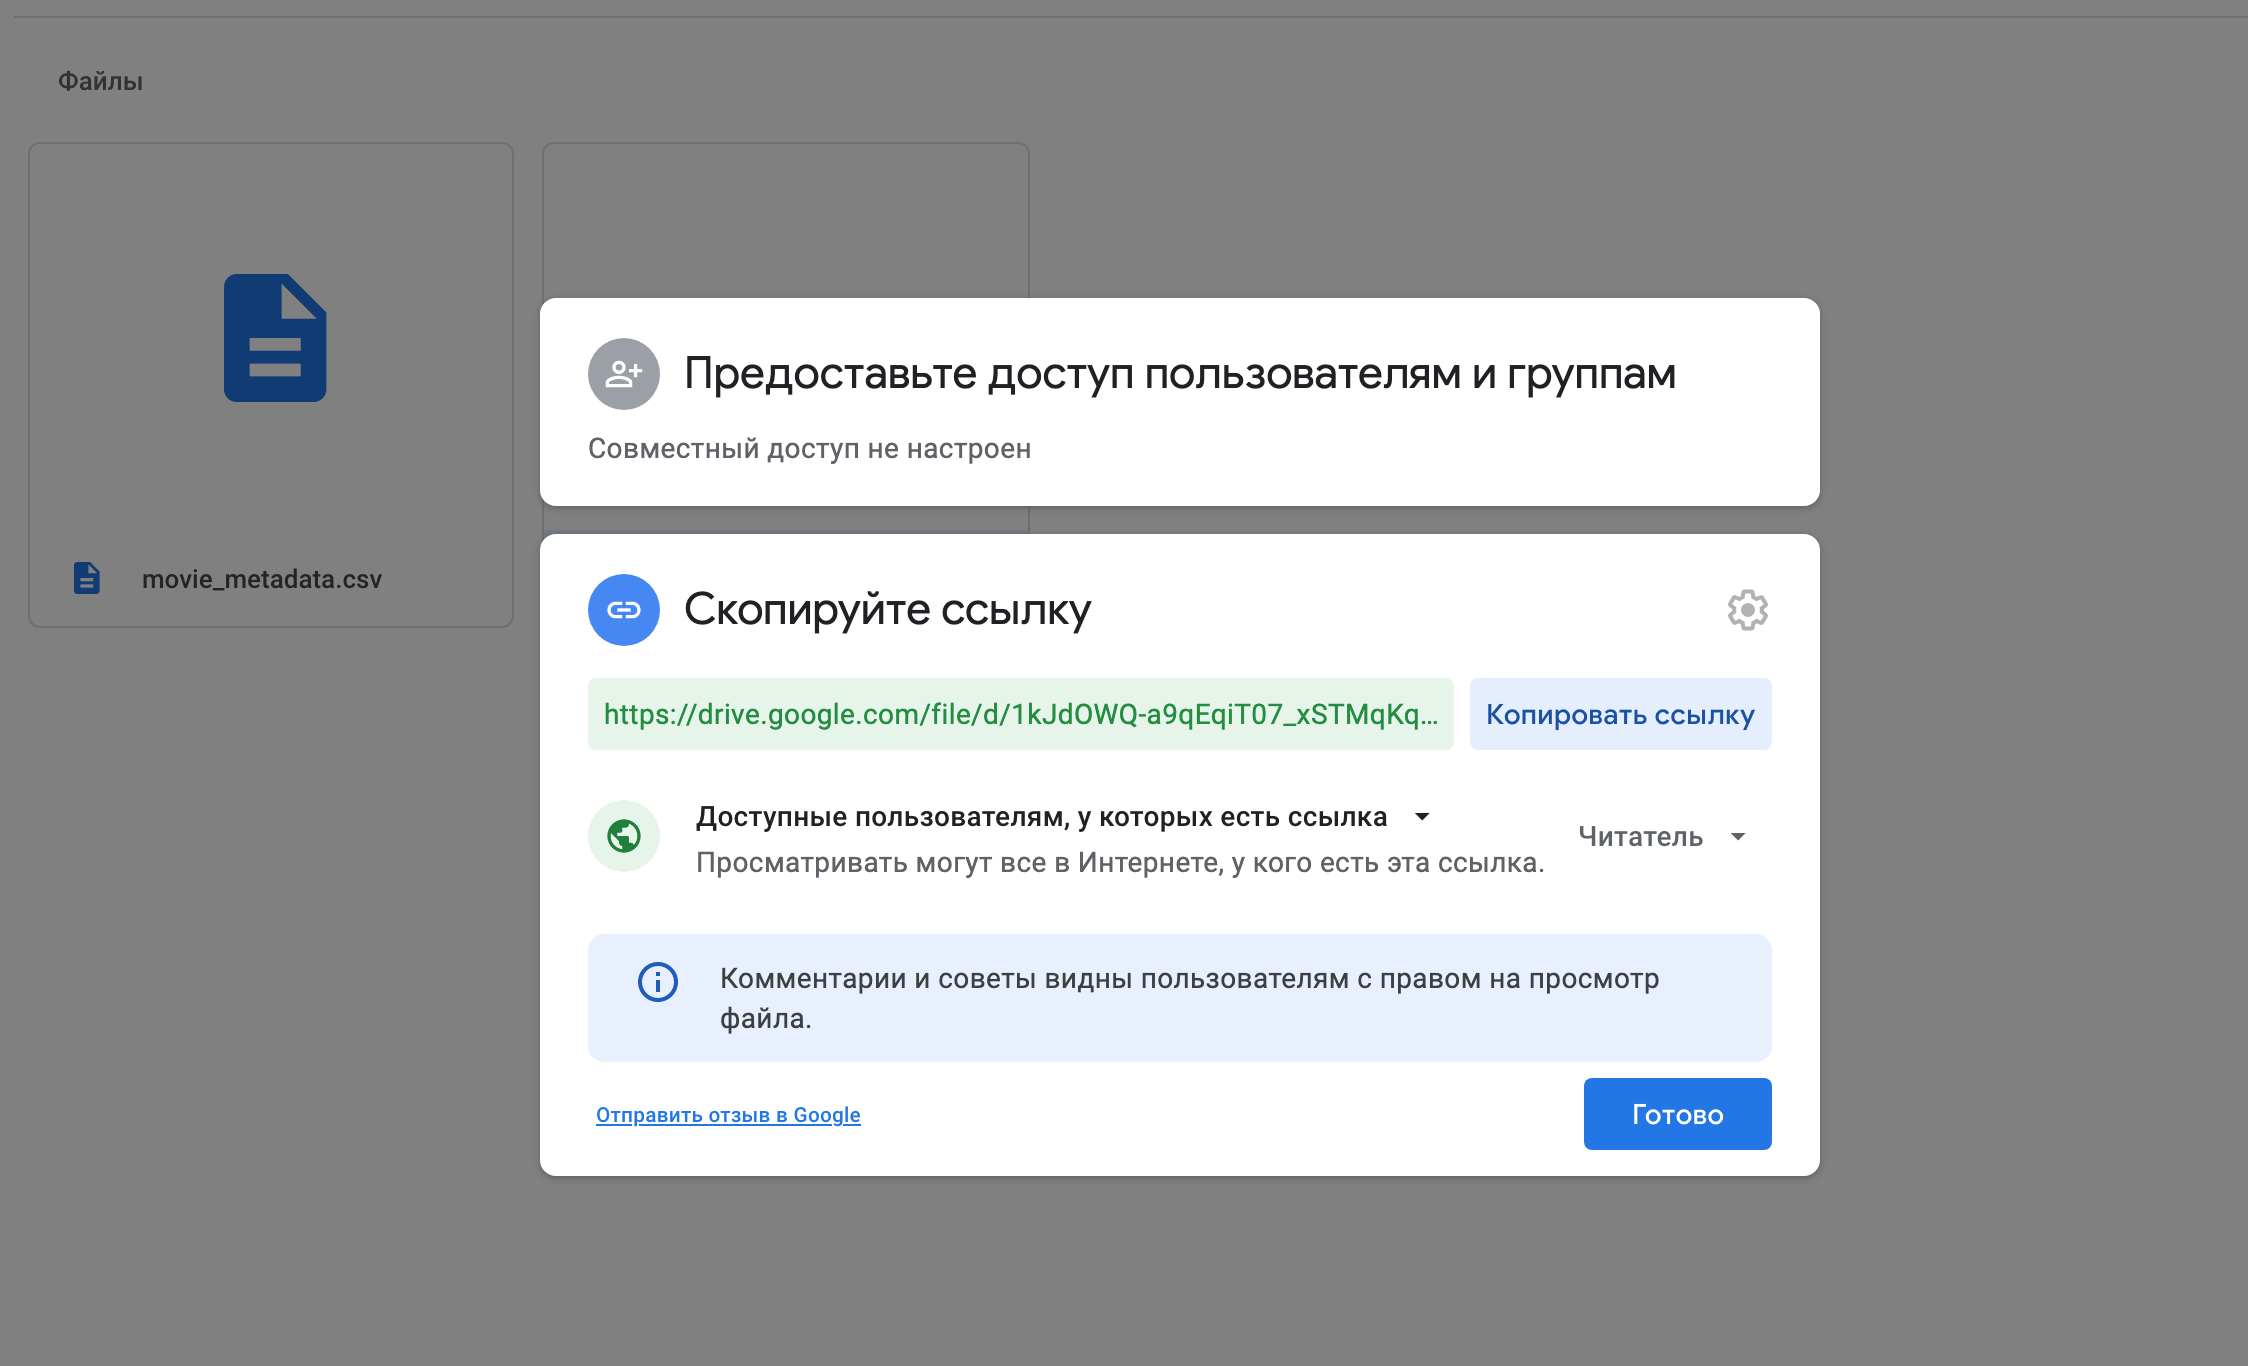



Эти символы используются в коде ниже для автоматической загрузки датасета в папку.

In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Аутентификация и создание PyDrive клиента.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')


movie_metadata = "1kJdOWQ-a9qEqiT07_xSTMqKqwtiodnnR" #В кавычках ID - это ссылка на мой расшаренный датасет из гугл диска

movie_metadata_file = drive.CreateFile({'id': movie_metadata }) #DRIVE_FILE_ID это файл ID пример ': 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(movie_metadata_file['title'])  
movie_metadata_file.GetContentFile(movie_metadata_file['title'])  # Сохраняет локально датасет


!unzip {movie_metadata_file['title']}

movie_metadata.csv.zip
Archive:  movie_metadata.csv.zip
  inflating: movie_metadata.csv      
  inflating: __MACOSX/._movie_metadata.csv  


In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv('movie_metadata.csv')
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


##Добавление необходимой информации

Добавим новый столбец Profit, которая показывает окупился ли фильм в прокате.

In [4]:
data['profit'] = data['gross'] - data['budget']

Посмотрим какие столбцы существуют в нашем датасете

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit'],
      dtype='object')

Скопируем семь атрибутов датасета в который добавим общую информацию по фильмам, для удобства работы.

In [6]:
dt = data[['genres','movie_title','language','title_year','imdb_score','duration','profit']]
dt.head(15)

,genres,movie_title,language,title_year,imdb_score,duration,profit
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,2009.0,7.9,178.0,523505847.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0
2,Action|Adventure|Thriller,Spectre,English,2015.0,6.8,148.0,-44925825.0
3,Action|Thriller,The Dark Knight Rises,English,2012.0,8.5,164.0,198130642.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,NaN,NaN
5,Action|Adventure|Sci-Fi,John Carter,English,2012.0,6.6,132.0,-190641321.0
6,Action|Adventure|Romance,Spider-Man 3,English,2007.0,6.2,156.0,78530303.0
7,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,English,2010.0,7.8,100.0,-59192738.0
8,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,English,2015.0,7.5,141.0,208991599.0
9,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,English,2009.0,7.5,153.0,51956980.0


In [7]:
dt.shape

(5043, 7)

Не удобно когда жанр на первой строчке, необходимо его перенести в конец. К тому же у нас несколько жанров у одного фильма. Надо привести в порядок.

Из столбца "Жанры":
1.   split - разбивает строку на массив, значения разделяются по "|"  
2.   apply - превращает в обьект типа series по макс длины матрицу одна строка в s
3.   stack - отсечь лишние наны + разворачивает из горизонтального в вертикальное положение
4.   index.droplevel(-1) - удаляет номера списков (series) 
5.   s.name = 'genres' - имя столбца 
6.   join(s) - обьединение, по умолчанию "Left" приоритет по левому столбцу  





In [8]:
s = dt['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dt['genres']
df = dt.join(s)

In [9]:
df.head(15)

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Adventure
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Fantasy
2,Spectre,English,2015.0,6.8,148.0,-44925825.0,Action
2,Spectre,English,2015.0,6.8,148.0,-44925825.0,Adventure
2,Spectre,English,2015.0,6.8,148.0,-44925825.0,Thriller


In [10]:
df.shape

(14504, 7)


Посмотрим сколько у нас уникальных значений столбца "Жанр"


In [11]:
df['genres'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Documentary', 'Romance', 'Animation', 'Comedy', 'Family',
       'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport',
       'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show',
       'Reality-TV', 'News', 'Short', 'Film-Noir'], dtype=object)

In [12]:
len(df['genres'].unique())

26

##Рейтинг

Нас интересуют фильмы с рейтингом >= 7

In [13]:
df1 = df[df['imdb_score']>=7]

In [14]:
df1.head()

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action


Сортировка фильмов в группы по жанрам. Вывод по убыванию (ascending)

In [15]:
df2 = (pd.DataFrame(df1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )

In [16]:
df2

,movie_title
genres,
Drama,1171
Comedy,456
Thriller,367
Romance,356
Crime,311
Adventure,302
Action,275
Biography,202
Sci-Fi,184


Гистограмма количества фильмов по рейтингу IMDB в жанрах

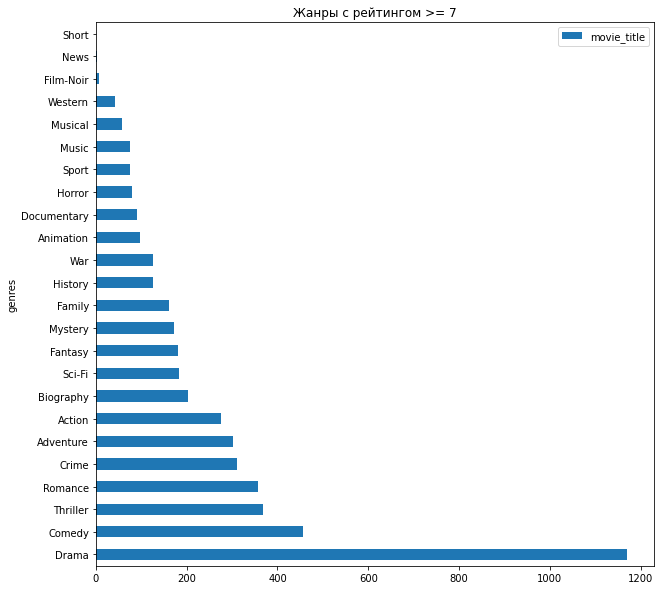

In [17]:
df2[['movie_title']].plot.barh(stacked=True, title = 'Жанры с рейтингом >= 7', figsize=(10, 10));

##Какие жанры наиболее прибыльные

Скопируем датасет со столбцами "Названия фильмов", "Прибыль" и "Жанр"


In [18]:
df3 = df[['movie_title', 'profit','genres']]

In [19]:
df3.head()

,movie_title,profit,genres
0,Avatar,523505847.0,Action
0,Avatar,523505847.0,Adventure
0,Avatar,523505847.0,Fantasy
0,Avatar,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,9404152.0,Action


Выведем все фильмы с жанром "Новости"

In [20]:

df3.loc[df3['genres'] == 'News']

,movie_title,profit,genres
2265,Capitalism: A Love Story,NaN,News
4348,The Square,NaN,News
4637,Food Chains,NaN,News


Групировка по среднему значению

In [21]:
df4 = df3.groupby(['genres']).mean()

Нас интересует миллионная прибыль. Для наглядности уберем тысячные поделив на 100тыс

In [22]:
df4['profit_million'] = df4['profit']/1000000
del df4['profit']

Сортировка по убыванию

In [23]:
df4.sort_values('profit_million', ascending=False, inplace = True )

Гистограмма жанров по среднему значению, принесшей миллионную прибыль или убытки

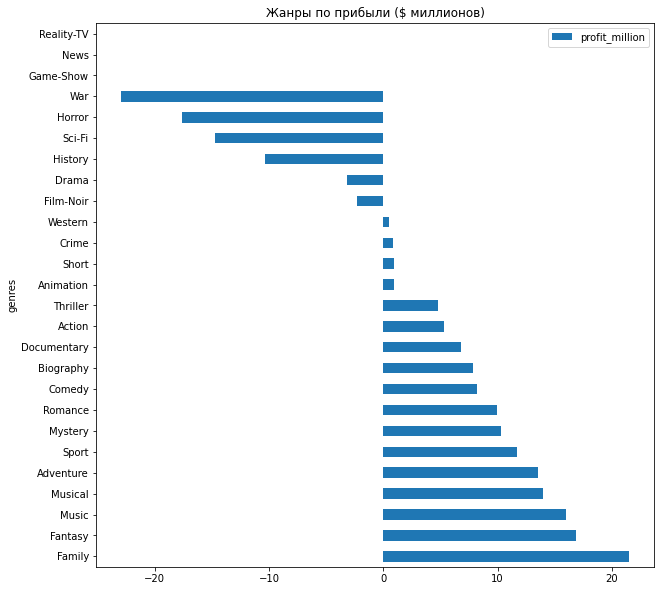

In [24]:
df4[['profit_million']].plot.barh(stacked=True, title = 'Жанры по прибыли ($ миллионов)', figsize=(10, 10));

##Длительность фильма

Скопируем столбцы длительность фильмов и жанр



In [25]:
df5 = df[['movie_title', 'duration','genres']]

In [26]:
df5.head()

,movie_title,duration,genres
0,Avatar,178.0,Action
0,Avatar,178.0,Adventure
0,Avatar,178.0,Fantasy
0,Avatar,178.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,169.0,Action


Группировка фильмов по жанрам со средней длительностью. Округление до двух цифр после запятой round(2). Удаляем не нужный столбец. Сортируем по убыванию.

In [27]:
df6 = df5.groupby(['genres']).mean()
df6['average_duration']  = df6['duration'].round(2)
del df6['duration']
df6.sort_values('average_duration', ascending=False, inplace = True )

In [28]:
df6

,average_duration
genres,
History,137.05
War,131.43
Biography,125.02
Western,120.14
Drama,112.88
Adventure,112.03
Action,110.99
Sport,110.23
Musical,109.51


Гистограмма верхнего метода

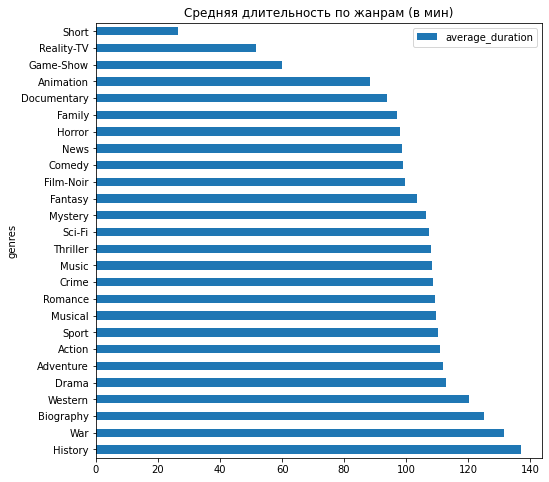

In [29]:
df6[['average_duration']].plot.barh(stacked=True, title = 'Средняя длительность по жанрам (в мин)', figsize=(8, 8));

##Работа с жанрами

###Год выхода

Скопируем в новый датасет два столбца "Год выхода" и "Жанр"

In [30]:
df7 = df[['title_year','genres']]

In [31]:
df7.head()

,title_year,genres
0,2009.0,Action
0,2009.0,Adventure
0,2009.0,Fantasy
0,2009.0,Sci-Fi
1,2007.0,Action


In [32]:
df7.shape

(14504, 2)

Фильмы вышедшие после 2005 года

In [33]:
df8 = df7[df7['title_year']>2005]

In [34]:
df8.shape

(6848, 2)

###Триллер

Интересует жанр Триллер. В последствии выведем гистограмму по убыванию

In [35]:
df9 = df8[df8['genres'] == 'Thriller']

In [36]:
df9.shape

(687, 2)

In [37]:
df10 = df9.groupby(['title_year']).count()

In [38]:
df10

,genres
title_year,
2006.0,62
2007.0,55
2008.0,56
2009.0,69
2010.0,60
2011.0,67
2012.0,65
2013.0,68
2014.0,80


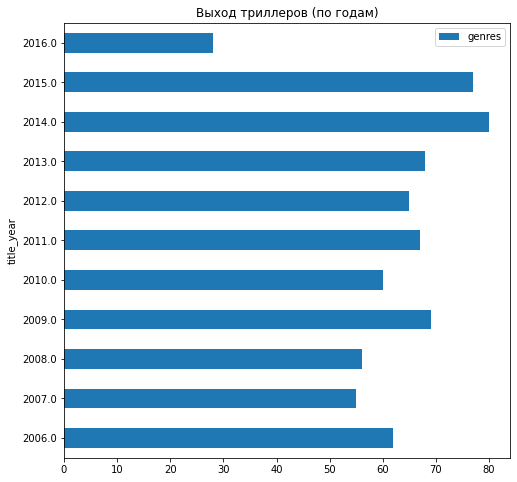

In [39]:
df10[['genres']].plot.barh(stacked=True, title = 'Выход триллеров (по годам)', figsize=(8, 8));

###Детектив

Жанр детектив

In [40]:
df11 = df8[df8['genres'] == 'Mystery']

In [41]:
df11.shape

(235, 2)

Группировка по кол-ву(count) фильмов вышедших в разные года

In [42]:
df12 = df11.groupby(['title_year']).count()

In [43]:
df12

,genres
title_year,
2006.0,23
2007.0,21
2008.0,20
2009.0,33
2010.0,18
2011.0,24
2012.0,17
2013.0,13
2014.0,28


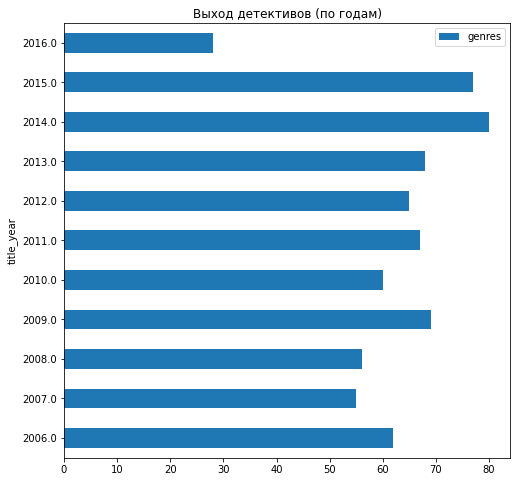

In [44]:
df10[['genres']].plot.barh(stacked=True, title = 'Выход детективов (по годам)', figsize=(8, 8));

Теперь можно наглядно рассмотреть данные по фильмам в разные года. Теперь пойдем снимать драммы или семейные фильмы, ведь тут больше прибыли. 

#Интерактив

####Какие 10 фильмов были самыми прибыльными?

In [45]:
df14 = dt[['movie_title', 'profit']]
df14.sort_values('profit', ascending=False, inplace=True)
df14.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movie_title,profit
0,Avatar,523505847.0
29,Jurassic World,502177271.0
26,Titanic,458672302.0
3024,Star Wars: Episode IV - A New Hope,449935665.0
3080,E.T. the Extra-Terrestrial,424449459.0
794,The Avengers,403279547.0
17,The Avengers,403279547.0
509,The Lion King,377783777.0
240,Star Wars: Episode I - The Phantom Menace,359544677.0
66,The Dark Knight,348316061.0


####Назовите 5 самых долгих фильмов за всю историю. Смотрели ли вы их?

In [46]:
df15 = dt[['movie_title', 'duration']]
df15.sort_values('duration', ascending=False, inplace=True)
df15.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0


####Какой режиссер снял больше всего фильмов?

In [47]:
df16 = data[['director_name']]


In [48]:
df17 = df16.assign(repetition=df16.groupby(['director_name']).cumcount().add(1))
df17.sort_values(['repetition'], ascending=False, inplace=True)
df17= df17.drop_duplicates(subset=['director_name'])
df17.head(5)

,director_name,repetition
5039,NaN,104
3080,Steven Spielberg,26
4324,Woody Allen,22
5001,Martin Scorsese,20
3673,Clint Eastwood,20


####Какие русские фильмы оказались в рейтинге IMDB? Какой жанр встречается чаще всего? У какого фильма самая большая прибыль?

####Назовите самый старый черно-белый фильм.

In [99]:
df18 = data[['color', 'movie_title','title_year']]
df18 = df18.dropna(subset=['title_year'])
df18.sample(5)

,color,movie_title,title_year
150,Color,Ghostbusters,2016.0
4237,Color,Jack Brooks: Monster Slayer,2007.0
3368,Color,50/50,2011.0
2105,Color,The Island,2005.0
3039,Color,Cruel Intentions,1999.0


In [50]:
df18['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [101]:
df18[(df18['color'] == ' Black and White')].tail(1)
#df18.sort_values('title_year', ascending=False, inplace=True)


,color,movie_title,title_year
5028,Black and White,Tin Can Man,2007.0


####Фильмы какой страны отображены в наибольшем количестве в этой статистике?

####Какая страна, снимающая фильмы, для вас оказалась самой неожиданной? =)

In [ ]:
unique

####Кто самый популярный актер в мире?